# Приоритизация и A/B-тесты гипотез для крупного интернет-магазина.

## Описание проекта
Для крупного интернет магазина, вместе с отделом маркетинга, мы подготовили список гипотез для увеличения выручки.


## Цель
Приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты. 


## Описание данных
<b>Структура `hypothesis.csv`</b>
- `'Hypothesis'` - краткое описание гипотезы.
- `'Reach'` - охват пользователей по 10-балльной шкале.
- `'Impact'` - влияние на пользователей по 10-балльной шкале.
- `'Confidence'` - уверенность в гипотезе по 10-балльной шкале.
- `'Efforts'` - затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

<b>Структура `orders.csv`</b>
- `'transactionId'` - идентификатор заказа.
- `'visitorId'` - идентификатор пользователя, совершившего заказ.
- `'date'` - дата, когда был совершён заказ.
- `'revenue'` - выручка заказа.
- `'group'` - группа A/B-теста, в которую попал заказ.

<b>Структура `visitors.csv`</b>
- `'date'` - дата.
- `'group'` - группа A/B-теста.
- `'visitors'` - количество пользователей в указанную дату в указанной группе A/B-тест.

## План работы
* Изучение данных.
* Анализ качества полученных данных.
* Предобработка данных.
    * Приводим названия столбцов к правильному виду.
    * Меняем тип данных.
    * Изучаем аномальные значения.
* Приоритизация гипотез.
    * Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.
    * Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.   
* Анализ A/B-теста.
    * Построим график кумулятивной выручки по группам.
    * Построим график кумулятивного среднего чека по группам.
    * Построим график относительного изменения кумулятивного среднего чека группы B к группе A.
    * Построим график кумулятивного среднего количества заказов на посетителя по группам.
    * Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
    * Построим точечный график количества заказов по пользователям.
    * Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.
    * Построим точечный график стоимостей заказов.
    * Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.
    * Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
    * Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
    * Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
    * Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
* Вывод, принимаем решение по результатам теста.

## Изучение данных.

In [1]:
#Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import os
import scipy.stats as stats

In [2]:
# Создаем DataFrame и делаем его копию
pth11 = '/datasets/hypothesis.csv'
pth12 = '/datasets/orders.csv'
pth13 = '/datasets/visitors.csv'
pth21 = 'e:\WORK\Образование\Аналитик данных\Dataset\Dataset\\hypothesis.csv'
pth22 = 'e:\WORK\Образование\Аналитик данных\Dataset\Dataset\\orders.csv'
pth23 = 'e:\WORK\Образование\Аналитик данных\Dataset\Dataset\\visitors.csv'

if os.path.exists(pth11):
    hypothesis = pd.read_csv(pth11)
elif os.path.exists(pth21):
    hypothesis = pd.read_csv(pth21)
else:
    print('Не найден DataSet - hypothesis')

if os.path.exists(pth12):
    orders = pd.read_csv(pth12)
elif os.path.exists(pth22):
    orders = pd.read_csv(pth22)
else:
    print('Не найден DataSet - orders')  

if os.path.exists(pth13):
    visitors = pd.read_csv(pth13)
elif os.path.exists(pth23):
    visitors = pd.read_csv(pth23)
else:
    print('Не найден DataSet - visitors')



columns = ['name', 'discription']
string = [
    ['Hypothesis', 'краткое описание гипотезы'],
    ['Reach', 'охват пользователей по 10-балльной шкале'],
    ['Impact', 'влияние на пользователей по 10-балльной шкале'],
    ['Confidence', 'уверенность в гипотезе по 10-балльной шкале'],
    ['Efforts', 'затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы']

]
data_columns_h = pd.DataFrame(columns=columns, data=string)

columns = ['name', 'discription']
string = [
    ['transactionId', 'идентификатор заказа'],
    ['visitorId', 'идентификатор пользователя, совершившего заказ'],
    ['date', 'дата, когда был совершён заказ'],
    ['revenue', 'выручка заказа'],
    ['group', 'группа A/B-теста, в которую попал заказ']

]
data_columns_o = pd.DataFrame(columns=columns, data=string)

columns = ['name', 'discription']
string = [
    ['date', 'дата'],
    ['group', 'группа A/B-теста'],
    ['visitors', 'количество пользователей в указанную дату в указанной группе A/B-тест']


]
data_columns_v = pd.DataFrame(columns=columns, data=string)




<b>Функции

In [3]:
def show_nan(data):

    ((pd.DataFrame(data.isna().mean()*100))
      .sort_values(by = 0, ascending = True)
      .plot(kind= 'barh', figsize=(10,4), legend = False, color='orange')
      .set_title('% NaNs')    
    );
    return

In [4]:
def data_analis_digits(data, data_columns, lenght=100, text=False):
    """
    Функция для первичного анализа DataFrame и формирования описательной части в Jupyter
    Передаваемые параметры: data - наш DataFrame, lenght - максимальное кол-во уникальных значений в столбце, text - надо ли формировать описательную часть
    
    """
    print('=====================================================================================================================')
    print('Анализ DataFrame')
    print('=====================================================================================================================')
    print('Этап 1. Первичный анализ.')
    print('=====================================================================================================================')
    display(data.info())
    display(data.sample(5, random_state =27))
    df = data.describe(include='all')
    for i in df.columns:
        df = df.rename(columns= {i: f'>{i}< U:{len(data[i].unique())} NaN:{data[i].isna().sum()} NaN%:{data[i].isna().mean():.2%} T:{data[i].dtypes}'})
    df = df.reset_index()
    if len(df.columns) > 7:
        for i in range(int((len(df.columns)) / 7)):
            df.insert(7*(i+1), 'index'+str(i+1), df['index'])
    display(df)
    plt.show()
    print('==================')
    print('Названия стобцов.')
    print('==================')
    print(data.columns)
    print('==================')
    print('Явные пропуски.')
    print('==================')
    print(data.isna().mean())
    print('==================')
    print('Явные дубликаты.')
    print('==================')
    print(data.duplicated().sum())
    print('==================')
    for i in data.columns:
        if len(data[i].unique()) <= lenght:
            print('======================================================')
            print('Уникальные значения и их кол-во в столбце:', i)
            print('======================================================')
            print(data.sort_values(by=i).groupby(i)[i].count())
    print('======================================================')
    print('Основные параметры числовых значений')
    print('======================================================')
    display(data.describe())
    if text:
        print('\n\n\n')
        print('Таблица для оформления анализа даннных DF.')
        print('## Анализ качества полученных данных.')
        print('В DataFrame:\n<br>- столбцов: ', len(data.columns), '\n<br>- строк: ', len(data), '\n<br>- явных дубликатов: ', data.duplicated().sum(), '\n<br>- доля пропусков в столбцах:\n<br>', sep='',end='')
        for i in data.columns:
            if data[i].isna().sum() > 0:
                print(f'{i}: {data[i].isna().mean():.2%} или {data[i].isna().sum()} шт.<br>')
                
        print('\n\n<b>Проанализируем качество данных в столбцах:<b>')
        for i in range(len(data_columns)):
            x="'"
            print('- `', x, data_columns['name'][i], x, '`','<br>Название столбца: правильное/не правильное.<br> Значения: количественные/категориальные.<br>Тип данных: ', data[data_columns['name'][i]].dtypes, '.<br> Значение: ', data_columns['discription'][i], '.<br>Проблемы: 1) Название в верхнем регистре, не правильная запись. 2) . 3) .<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, записать правильно.', sep='')            
        
        print('\n\n Для вводной части')
        for i in range(len(data_columns)):
            x="'"
            print('- `', x, data_columns['name'][i], x, '`',' - ', data_columns['discription'][i],'.', sep='') 

In [5]:
def data_analis_visual(data, length=30):
    print('======================================================')
    print('Процент пропуска в данных')
    print('======================================================')
    ((pd.DataFrame(data.isna().mean()*100))
      .sort_values(by = 0, ascending = True)
      .plot(kind= 'barh', figsize=(10,4), legend = False, color='orange')
      .set_title('% NaNs')    
    );
    plt.show()
    print('======================================================')
    print('Визуальный анализ категорииалльных переменных')
    print('======================================================')
    temp = []
    for i in data.select_dtypes(exclude=['float64', 'int64']).columns: 
        if len(data[i].unique()) > length:
            temp.append(i)
    print('Слишком большое кол-во кникальных значений у категориальных переменных в столбцах: ', temp,'\n\n')
    for i in data.select_dtypes(exclude=['float64', 'int64']).columns: 
        if len(data[i].unique()) < length:
            data[i].value_counts().plot(kind='barh', legend=True);
            plt.show()    
    print('======================================================')
    print('Визуальный анализ количественных переменных')
    print('======================================================')
    temp = []
    for i in data.select_dtypes(include=['float64', 'int64']).columns:
        if data[i].nunique() < length:
            data[i].hist(range=(0,data[i].std()*8), bins=len(data[i].unique())+ 30, figsize=(6,4), legend=True);
            plt.show()
        else:
            temp.append(i)
            print('Гистограмма не показательна для:', temp)
   
    return

In [6]:
def mustache(data, side):
    if side == 'left':
        size_of_mustache = data.quantile(.25) - (data.quantile(.75) - data.quantile(.25))*1.5
        if size_of_mustache <0:
            size_of_mustache = 0
    elif side == 'right':
        size_of_mustache = data.quantile(.75) + (data.quantile(.75) - data.quantile(.25))*1.5
    elif side == 'lenght':
        size_of_mustache = (data.quantile(.75) - data.quantile(.25))*1.5
    return float(size_of_mustache)

In [7]:
def mustache_analis(data, name, b=100, xname='', yname='', title=''):
    """
    Функция для вывода данных столбца (гистограммы, таблицы, границы) для анализа аномалий, 
    типа распределения, массива данных в целом.
    
    """ 
    plt.title(title)
    plt.xlabel(xname)
    plt.ylabel(yname)
    data[name].hist(bins=b);
    plt.show()
    print('Левая граница усов:', mustache(data[name], side='left'))
    print('Правая граница усов:', mustache(data[name], side='right'))
    try:
        plt.title('Коробка с усами')
        plt.xlabel(xname)
        plt.ylabel(yname)
        data[name].hist(range=(mustache(data[name], side='left'), mustache(data[name], side='right')), bins=b);
        plt.show()
    except:
        print('Ошибка')
    if mustache(data[name], side='left') > 0:
        plt.title('За левым усом')
        plt.xlabel(xname)
        plt.ylabel(yname)
        data[name].hist(range=(0, mustache(data[name], side='left')), bins=b);
        plt.show()
    if mustache(data[name], side='right') < data[name].max():
        plt.title('За правм усом')
        plt.xlabel(xname)
        plt.ylabel(yname)
        data[name].hist(range=(mustache(data[name], side='right'), data[name].max()), bins=b);
        plt.show()
    print('Первые 10 минимальных параметров', name)
    display(data.sort_values(by=name).head(10))
    print('Первые 10 максимальных параметров', name)
    display(data.sort_values(by=name, ascending=False).head(10))
    
    try:
        print('Сводная таблица по области за левым усом', name)
        display(data[(data[name] < mustache(data[name], side='left'))].describe(include='all'))
    except:
        print('Ошибка')
    try:
        print('Сводная таблица по области за правм усом', name)
        display(data[(data[name] > mustache(data[name], side='right'))].describe(include='all'))
    except:
        print('Ошибка')
        
    print('Доля объявлений с анамально низкими параметрами: {:.2%}'.format(data[(data[name] < mustache(data[name], side='left'))][name].count()/len(data)))
    print('Доля объявлений с анамально высокими параметрами {:.2%}'.format(data[(data[name] > mustache(data[name], side='right'))][name].count()/len(data)))
    return

Анализ DataFrame
Этап 1. Первичный анализ.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3


,index,>Hypothesis< U:9 NaN:0 NaN%:0.00% T:object,>Reach< U:6 NaN:0 NaN%:0.00% T:int64,>Impact< U:7 NaN:0 NaN%:0.00% T:int64,>Confidence< U:7 NaN:0 NaN%:0.00% T:int64,>Efforts< U:6 NaN:0 NaN%:0.00% T:int64
0,count,9,9.000000,9.000000,9.000000,9.000000
1,unique,9,NaN,NaN,NaN,NaN
2,top,"Добавить два новых канала привлечения трафика,...",NaN,NaN,NaN,NaN
3,freq,1,NaN,NaN,NaN,NaN
4,mean,NaN,4.777778,4.777778,5.555556,4.888889
5,std,NaN,3.153481,3.192874,3.045944,2.803767
6,min,NaN,1.000000,1.000000,1.000000,1.000000
7,25%,NaN,3.000000,3.000000,3.000000,3.000000
8,50%,NaN,3.000000,3.000000,7.000000,5.000000
9,75%,NaN,8.000000,7.000000,8.000000,6.000000


Названия стобцов.
Index(['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Efforts'], dtype='object')
Явные пропуски.
Hypothesis    0.0
Reach         0.0
Impact        0.0
Confidence    0.0
Efforts       0.0
dtype: float64
Явные дубликаты.
0
Уникальные значения и их кол-во в столбце: Hypothesis
Hypothesis
Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа    1
Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей              1
Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов                        1
Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок                1
Запустить акцию, дающую скидку на товар в день рождения                                                         1
Запустить собственную службу доставки, что сократит срок доставки заказов                                       1
Изменить ст

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000






Таблица для оформления анализа даннных DF.
## Анализ качества полученных данных.
В DataFrame:
<br>- столбцов: 5
<br>- строк: 9
<br>- явных дубликатов: 0
<br>- доля пропусков в столбцах:
<br>

<b>Проанализируем качество данных в столбцах:<b>
- `'Hypothesis'`<br>Название столбца: правильное/не правильное.<br> Значения: количественные/категориальные.<br>Тип данных: object.<br> Значение: краткое описание гипотезы.<br>Проблемы: 1) Название в верхнем регистре, не правильная запись. 2) . 3) .<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, записать правильно.
- `'Reach'`<br>Название столбца: правильное/не правильное.<br> Значения: количественные/категориальные.<br>Тип данных: int64.<br> Значение: охват пользователей по 10-балльной шкале.<br>Проблемы: 1) Название в верхнем регистре, не правильная запись. 2) . 3) .<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, записать правильно.
- `'Impact'`<br>Название столбца: правильное/н

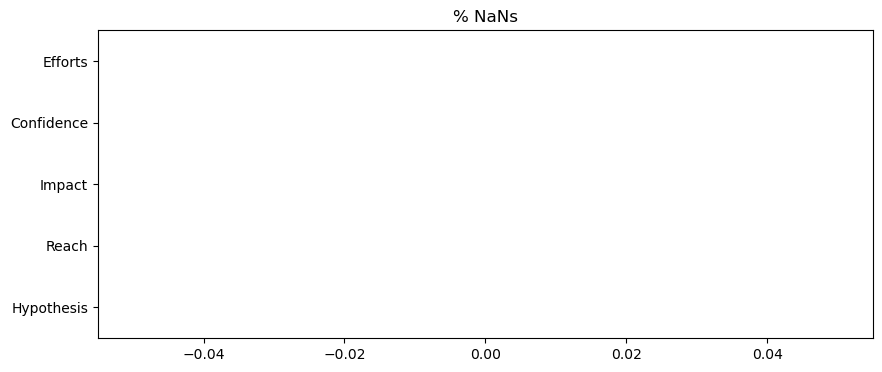

Визуальный анализ категорииалльных переменных
Слишком большое кол-во кникальных значений у категориальных переменных в столбцах:  [] 




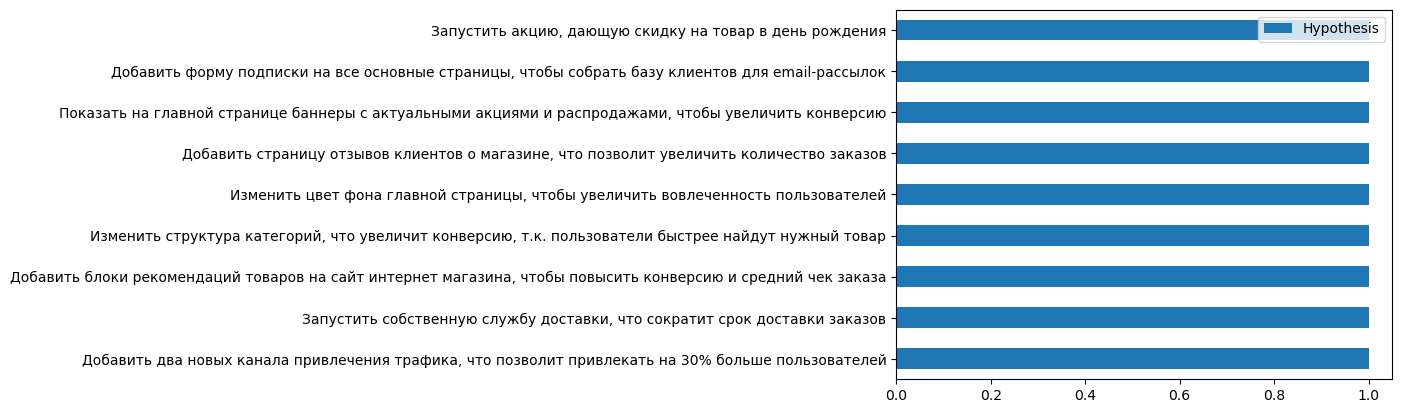

Визуальный анализ количественных переменных


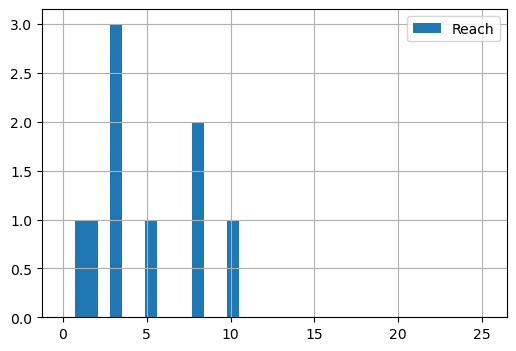

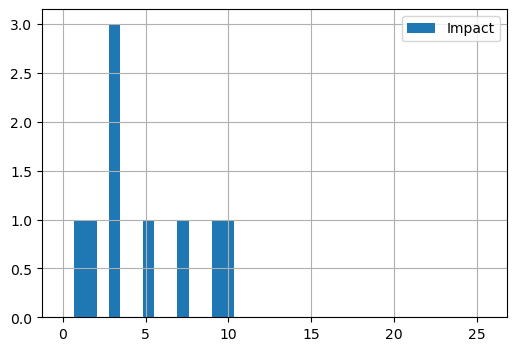

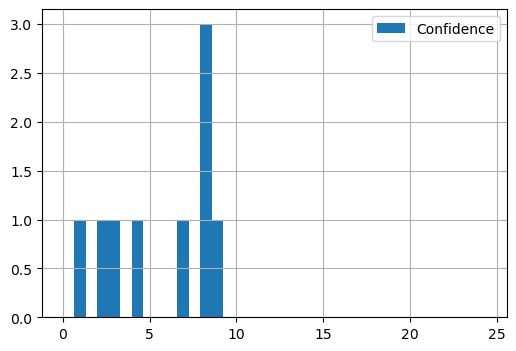

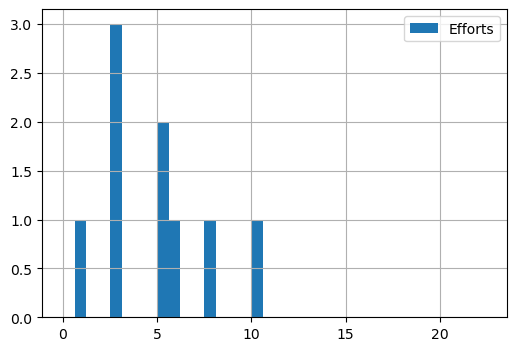

In [8]:
data_analis_digits(hypothesis, data_columns_h, text=True)
data_analis_visual(hypothesis)

Анализ DataFrame
Этап 1. Первичный анализ.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
318,3412626998,3282099314,2019-08-19,11985,A
104,627804981,611059232,2019-08-01,17600,A
1062,1817215137,2458001652,2019-08-11,8280,A
117,722060263,2038680547,2019-08-22,760,A
277,3017343075,1261629107,2019-08-02,4877,B


,index,>transactionId< U:1197 NaN:0 NaN%:0.00% T:int64,>visitorId< U:1031 NaN:0 NaN%:0.00% T:int64,>date< U:31 NaN:0 NaN%:0.00% T:object,>revenue< U:713 NaN:0 NaN%:0.00% T:int64,>group< U:2 NaN:0 NaN%:0.00% T:object
0,count,1.197000e+03,1.197000e+03,1197,1.197000e+03,1197
1,unique,NaN,NaN,31,NaN,2
2,top,NaN,NaN,2019-08-05,NaN,B
3,freq,NaN,NaN,48,NaN,640
4,mean,2.155621e+09,2.165960e+09,NaN,8.348006e+03,NaN
5,std,1.229085e+09,1.236014e+09,NaN,3.919113e+04,NaN
6,min,1.062393e+06,5.114589e+06,NaN,5.000000e+01,NaN
7,25%,1.166776e+09,1.111826e+09,NaN,1.220000e+03,NaN
8,50%,2.145194e+09,2.217985e+09,NaN,2.978000e+03,NaN
9,75%,3.237740e+09,3.177606e+09,NaN,8.290000e+03,NaN


Названия стобцов.
Index(['transactionId', 'visitorId', 'date', 'revenue', 'group'], dtype='object')
Явные пропуски.
transactionId    0.0
visitorId        0.0
date             0.0
revenue          0.0
group            0.0
dtype: float64
Явные дубликаты.
0
Уникальные значения и их кол-во в столбце: date
date
2019-08-01    45
2019-08-02    44
2019-08-03    40
2019-08-04    33
2019-08-05    48
2019-08-06    46
2019-08-07    42
2019-08-08    43
2019-08-09    41
2019-08-10    39
2019-08-11    26
2019-08-12    47
2019-08-13    35
2019-08-14    47
2019-08-15    46
2019-08-16    38
2019-08-17    24
2019-08-18    26
2019-08-19    43
2019-08-20    32
2019-08-21    37
2019-08-22    41
2019-08-23    40
2019-08-24    31
2019-08-25    24
2019-08-26    41
2019-08-27    44
2019-08-28    45
2019-08-29    42
2019-08-30    35
2019-08-31    32
Name: date, dtype: int64
Уникальные значения и их кол-во в столбце: group
group
A    557
B    640
Name: group, dtype: int64
Основные параметры числовых значений


,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06






Таблица для оформления анализа даннных DF.
## Анализ качества полученных данных.
В DataFrame:
<br>- столбцов: 5
<br>- строк: 1197
<br>- явных дубликатов: 0
<br>- доля пропусков в столбцах:
<br>

<b>Проанализируем качество данных в столбцах:<b>
- `'transactionId'`<br>Название столбца: правильное/не правильное.<br> Значения: количественные/категориальные.<br>Тип данных: int64.<br> Значение: идентификатор заказа.<br>Проблемы: 1) Название в верхнем регистре, не правильная запись. 2) . 3) .<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, записать правильно.
- `'visitorId'`<br>Название столбца: правильное/не правильное.<br> Значения: количественные/категориальные.<br>Тип данных: int64.<br> Значение: идентификатор пользователя, совершившего заказ.<br>Проблемы: 1) Название в верхнем регистре, не правильная запись. 2) . 3) .<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, записать правильно.
- `'date'`<br>Название столбца: прав

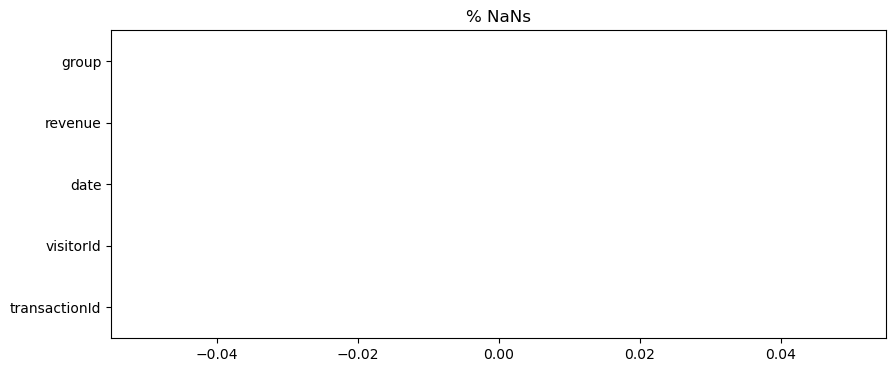

Визуальный анализ категорииалльных переменных
Слишком большое кол-во кникальных значений у категориальных переменных в столбцах:  ['date'] 




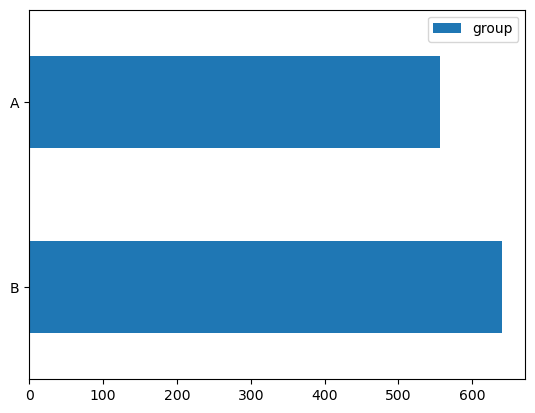

Визуальный анализ количественных переменных
Гистограмма не показательна для: ['transactionId']
Гистограмма не показательна для: ['transactionId', 'visitorId']
Гистограмма не показательна для: ['transactionId', 'visitorId', 'revenue']


In [9]:
data_analis_digits(orders, data_columns_o, text=True)
data_analis_visual(orders)

Анализ DataFrame
Этап 1. Первичный анализ.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
6,2019-08-07,A,644
36,2019-08-06,B,655
1,2019-08-02,A,619
27,2019-08-28,A,594
14,2019-08-15,A,628


,index,>date< U:31 NaN:0 NaN%:0.00% T:object,>group< U:2 NaN:0 NaN%:0.00% T:object,>visitors< U:58 NaN:0 NaN%:0.00% T:int64
0,count,62,62,62.000000
1,unique,31,2,NaN
2,top,2019-08-01,A,NaN
3,freq,2,31,NaN
4,mean,NaN,NaN,607.290323
5,std,NaN,NaN,114.400560
6,min,NaN,NaN,361.000000
7,25%,NaN,NaN,534.000000
8,50%,NaN,NaN,624.500000
9,75%,NaN,NaN,710.500000


Названия стобцов.
Index(['date', 'group', 'visitors'], dtype='object')
Явные пропуски.
date        0.0
group       0.0
visitors    0.0
dtype: float64
Явные дубликаты.
0
Уникальные значения и их кол-во в столбце: date
date
2019-08-01    2
2019-08-02    2
2019-08-03    2
2019-08-04    2
2019-08-05    2
2019-08-06    2
2019-08-07    2
2019-08-08    2
2019-08-09    2
2019-08-10    2
2019-08-11    2
2019-08-12    2
2019-08-13    2
2019-08-14    2
2019-08-15    2
2019-08-16    2
2019-08-17    2
2019-08-18    2
2019-08-19    2
2019-08-20    2
2019-08-21    2
2019-08-22    2
2019-08-23    2
2019-08-24    2
2019-08-25    2
2019-08-26    2
2019-08-27    2
2019-08-28    2
2019-08-29    2
2019-08-30    2
2019-08-31    2
Name: date, dtype: int64
Уникальные значения и их кол-во в столбце: group
group
A    31
B    31
Name: group, dtype: int64
Уникальные значения и их кол-во в столбце: visitors
visitors
361    1
369    1
378    1
395    1
406    1
412    1
413    1
421    1
468    1
487    1
490    2


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000






Таблица для оформления анализа даннных DF.
## Анализ качества полученных данных.
В DataFrame:
<br>- столбцов: 3
<br>- строк: 62
<br>- явных дубликатов: 0
<br>- доля пропусков в столбцах:
<br>

<b>Проанализируем качество данных в столбцах:<b>
- `'date'`<br>Название столбца: правильное/не правильное.<br> Значения: количественные/категориальные.<br>Тип данных: object.<br> Значение: дата.<br>Проблемы: 1) Название в верхнем регистре, не правильная запись. 2) . 3) .<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, записать правильно.
- `'group'`<br>Название столбца: правильное/не правильное.<br> Значения: количественные/категориальные.<br>Тип данных: object.<br> Значение: группа A/B-теста.<br>Проблемы: 1) Название в верхнем регистре, не правильная запись. 2) . 3) .<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, записать правильно.
- `'visitors'`<br>Название столбца: правильное/не правильное.<br> Значения: количественные/кате

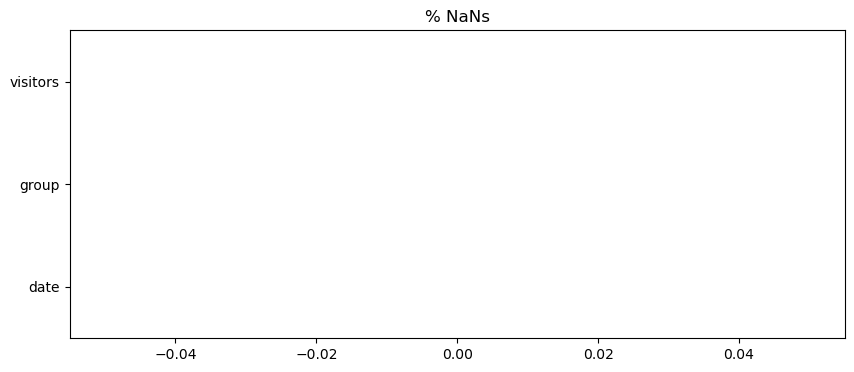

Визуальный анализ категорииалльных переменных
Слишком большое кол-во кникальных значений у категориальных переменных в столбцах:  ['date'] 




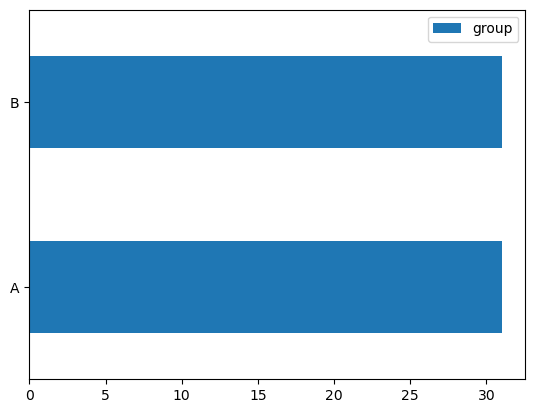

Визуальный анализ количественных переменных
Гистограмма не показательна для: ['visitors']


In [10]:
data_analis_digits(visitors, data_columns_v, text=True)
data_analis_visual(visitors)

## Анализ качества полученных данных.
В DataFrame hypothesis:
<br>- столбцов: 5
<br>- строк: 9
<br>- явных дубликатов: 0
<br>- доля пропусков в столбцах: 0

<b>Проанализируем качество данных в столбцах:<b>
- `'Hypothesis'`, `'Reach'`, `'Impact'`, `'Confidence'`, `'Efforts'` - Названия в верхнем регистре, других проблем нет.

В DataFrame orders:
<br>- столбцов: 5
<br>- строк: 1197
<br>- явных дубликатов: 0
<br>- доля пропусков в столбцах: 0
    
<b>Проанализируем качество данных в столбцах:<b>
- `'transactionId'`<br>Название столбца: не правильное.<br> Значения: количественные.<br>Тип данных: int64.<br> Значение: идентификатор заказа.<br>Проблемы: 1) Название в верхнем регистре, не правильная запись.<br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, записать правильно.
- `'visitorId'`<br>Название столбца: не правильное.<br> Значения: количественные.<br>Тип данных: int64.<br> Значение: идентификатор пользователя, совершившего заказ.<br>Проблемы: 1) Название в верхнем регистре, не правильная запись. <br>Наблюдение: .<br>Рекомендации: привести название столбца к нижнему регистру, записать правильно.
- `'date'`<br>Название столбца: правильное.<br> Значения: количественные.<br>Тип данных: object.<br> Значение: дата, когда был совершён заказ.<br>Проблемы: .<br>Наблюдение: данные за август 2019 г.<br>Рекомендации: .
- `'revenue'`<br>Название столбца: правильное.<br> Значения: количественныее.<br>Тип данных: int64.<br> Значение: выручка заказа.<br>Проблемы: 1) Есть аномалии. <br>Наблюдение: .<br>Рекомендации: проверить аномалии.
- `'group'`<br>Название столбца: правильное.<br> Значения: категориальные.<br>Тип данных: object.<br> Значение: группа A/B-теста, в которую попал заказ.
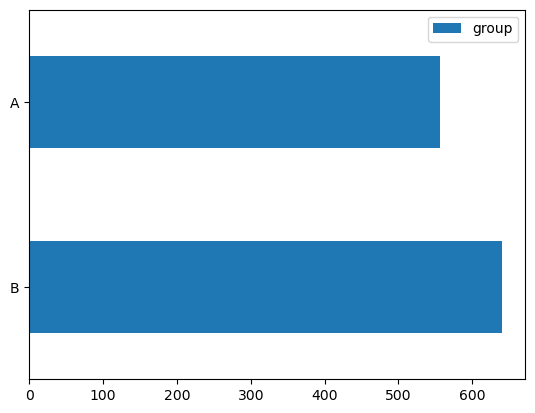
    
В DataFrame visitors:
<br>- столбцов: 3
<br>- строк: 62
<br>- явных дубликатов: 0
<br>- доля пропусков в столбцах:0
<br>

<b>Проанализируем качество данных в столбцах:<b>
- `'date'`<br>Название столбца: правильное.<br> Значения: количественные.<br>Тип данных: object.<br> Значение: дата.<br>Проблемы: . <br>Наблюдение: данные за август 2019 г.<br>Рекомендации: .
- `'group'`<br>Название столбца: правильное.<br> Значения: категориальные.<br>Тип данных: object.<br> Значение: группа A/B-теста.<br>Проблемы:  .<br>Наблюдение: .<br>Рекомендации: .
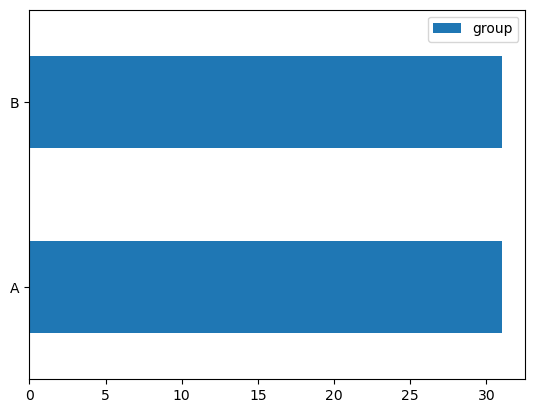
- `'visitors'`<br>Название столбца: правильное.<br> Значения: количественные.<br>Тип данных: int64.<br> Значение: количество пользователей в указанную дату в указанной группе A/B-тест.<br>Проблемы: .<br>Наблюдение: .<br>Рекомендации: .
    

## Предобработка данных

### Приводим названия столбцовк правильному виду

In [11]:
hypothesis.columns = hypothesis.columns.str.lower()

In [12]:
orders.columns = orders.columns.str.lower()
orders = orders.rename(columns={'transactionid':'transaction_id', 'visitorid':'visitor_id'})

### Меняем тип данных

In [13]:
orders['date'] = pd.to_datetime(orders['date']).dt.date
visitors['date'] = pd.to_datetime(visitors['date']).dt.date

### Изучаем явные аномальные значения

`'revenue'` - сумма заказа.

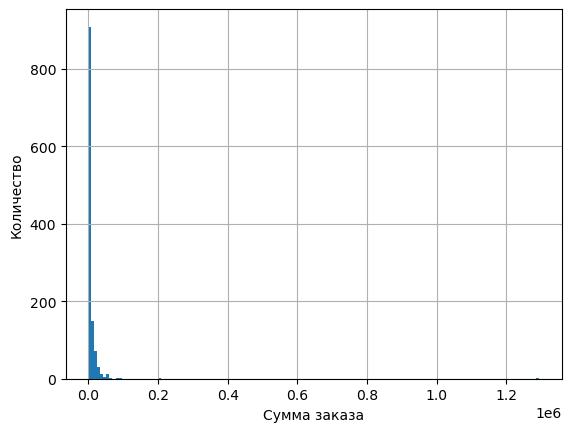

Левая граница усов: 0.0
Правая граница усов: 18895.0


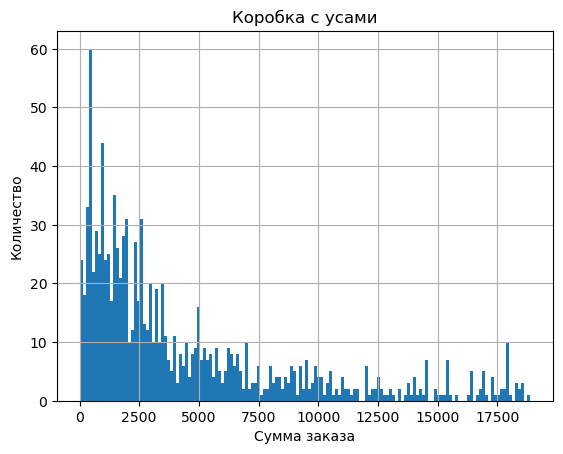

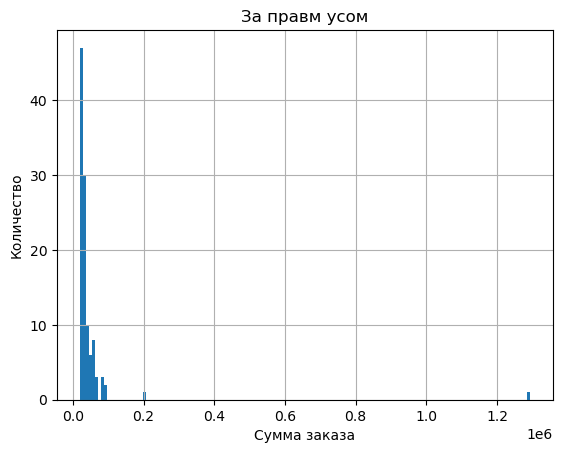

Первые 10 минимальных параметров revenue


,transaction_id,visitor_id,date,revenue,group
584,1126146019,2705308997,2019-08-20,50,A
1091,750632879,4256040402,2019-08-12,50,A
756,125335873,3423937755,2019-08-30,50,B
459,863448794,2738601405,2019-08-19,50,B
1013,83566152,232979603,2019-08-31,60,A
933,3760662696,3577713868,2019-08-27,60,B
404,2052514069,1995481842,2019-08-28,70,B
908,3352225027,1807547430,2019-08-05,75,B
307,1404959653,3896738923,2019-08-18,76,A
878,3315359627,1831956319,2019-08-05,90,A


Первые 10 максимальных параметров revenue


,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


Сводная таблица по области за левым усом revenue


,transaction_id,visitor_id,date,revenue,group
count,0.0,0.0,0,0.0,0
unique,NaN,NaN,0,NaN,0
top,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN


Сводная таблица по области за правм усом revenue


,transaction_id,visitor_id,date,revenue,group
count,1.110000e+02,1.110000e+02,111,1.110000e+02,111
unique,NaN,NaN,29,NaN,2
top,NaN,NaN,2019-08-29,NaN,B
freq,NaN,NaN,9,NaN,62
mean,2.152312e+09,2.233832e+09,NaN,4.735832e+04,NaN
std,1.192109e+09,1.247510e+09,NaN,1.216720e+05,NaN
min,5.144316e+07,1.132989e+08,NaN,1.890000e+04,NaN
25%,1.265233e+09,9.858245e+08,NaN,2.179500e+04,NaN
50%,2.148937e+09,2.357168e+09,NaN,2.949900e+04,NaN
75%,3.105136e+09,3.198327e+09,NaN,4.109500e+04,NaN


Доля объявлений с анамально низкими параметрами: 0.00%
Доля объявлений с анамально высокими параметрами 9.27%


In [14]:
mustache_analis(orders, name='revenue', b=150, xname='Сумма заказа', yname='Количество')

<b>Вывод:</b> Большая часть заказов до 100 т.р. есть один аномально большоой заказ, остальные в 10-ки раз меньше. С этой аномалией разберемся позже.

## Приоритизация гипотез.

### Применим фреймворк ICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

<b>ICE (от англ. impact, confidence, effort / ease «влияние, уверенность, усилия / простота»).

In [15]:
pd.set_option('display.max_colwidth', None)
hypothesis['framework_ice'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'], 2)
display(hypothesis.sort_values(by='framework_ice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,framework_ice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00


<b>Вывод:</b><br>

<b>С учетом фреймворк ICE, в первой тройке у нас (по убыванию):</b>
- Запустить акцию, дающую скидку на товар в день рождения;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок. 

<b>В конце рейтинга (по убыванию):</b>
- Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов;
- Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар;
- Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.


### Применим фреймворк RICE для приоритизации гипотез. Отсортируем их по убыванию приоритета.

<b>RICE (от англ. reach, impact, confidence, effort / ease «доля пользователей, влияние, уверенность, усилия / простота»).

In [16]:
hypothesis['framework_rice'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']
display(hypothesis.sort_values(by='framework_rice', ascending=False))

,hypothesis,reach,impact,confidence,efforts,framework_ice,framework_rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


<b>Вывод:</b><br>

<b>С учетом фреймворк RICE, в первой тройке у нас (по убыванию):</b>
- Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок;
- Добавить блоки рекомендаций товаров на сайт интернет-магазина, чтобы повысить конверсию и средний чек заказа;
- Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей;


<b>В конце рейтинга (по убыванию):</b>
- Запустить собственную службу доставки, что сократит срок доставки заказов;
- Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов;
- Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей.

<b></b><br>
<b>Как мы видим, в первой и последней тройке изменился порядок следования и изменилась одна из гипотез, это связано с тем, что в фреймворк RICE дополнительно учитывается часть аудитории, которую может затронуть изменение, если аудитория не существенна, то и нет смысла проверять гипотезу, т.к. нововведение не приведет к существенным изменениям в ключевых метриках компании.

## Анализ A/B-теста

### Построим график кумулятивной выручки по группам.

In [17]:
orders_cumsum = orders.pivot_table(index=['date', 'group'], values='revenue', aggfunc=('sum','count')).reset_index()
orders_cumsum = orders_cumsum.rename(columns={'count': 'revenue_count', 'sum':'revenue_sum'})
orders_cumsum.loc[orders_cumsum['group'] == 'A', 'revenue_cumsum'] = orders_cumsum.loc[orders_cumsum['group'] == 'A', 'revenue_sum'].cumsum()
orders_cumsum.loc[orders_cumsum['group'] == 'B', 'revenue_cumsum'] = orders_cumsum.loc[orders_cumsum['group'] == 'B', 'revenue_sum'].cumsum()

In [18]:
orders_cumsum.head(15)

,date,group,revenue_count,revenue_sum,revenue_cumsum
0,2019-08-01,A,24,148579,148579.0
1,2019-08-01,B,21,101217,101217.0
2,2019-08-02,A,20,93822,242401.0
3,2019-08-02,B,24,165531,266748.0
4,2019-08-03,A,24,112473,354874.0
5,2019-08-03,B,16,114248,380996.0
6,2019-08-04,A,16,70825,425699.0
7,2019-08-04,B,17,108571,489567.0
8,2019-08-05,A,25,124218,549917.0
9,2019-08-05,B,23,92428,581995.0


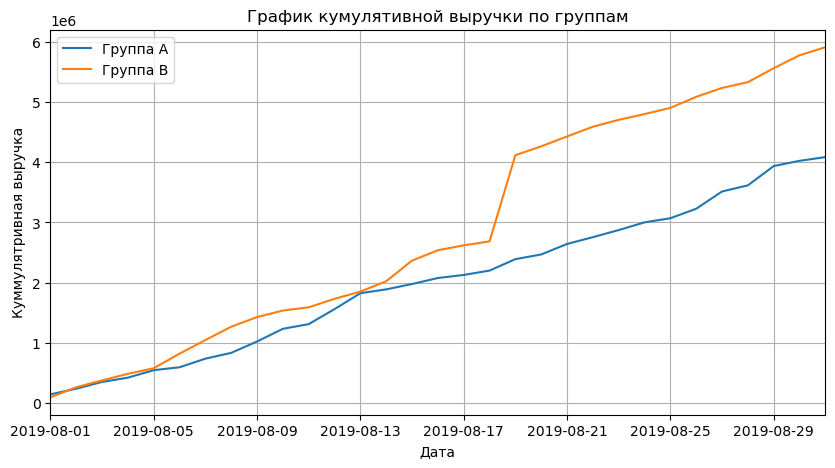

In [19]:
orders_cumsum[orders_cumsum['group'] == 'A'].plot(x='date', y='revenue_cumsum', label='A', figsize=(10,5), ax=plt.subplot(1,1,1), grid=True)
orders_cumsum[orders_cumsum['group'] == 'B'].plot(x='date', y='revenue_cumsum', label='B', figsize=(10,5), ax=plt.subplot(1,1,1), grid=True)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Куммулятривная выручка')
plt.legend(labels=['Группа А', 'Группа B'])
plt.axis(xmin=('2019-08-01'), xmax=('2019-08-31'))
plt.show();

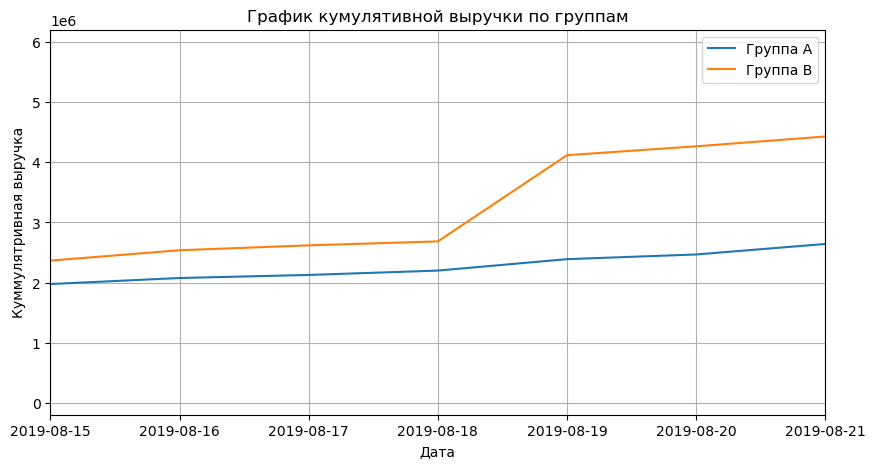

In [20]:
orders_cumsum[orders_cumsum['group'] == 'A'].plot(x='date', y='revenue_cumsum', label='A', figsize=(10,5), ax=plt.subplot(1,1,1), grid=True)
orders_cumsum[orders_cumsum['group'] == 'B'].plot(x='date', y='revenue_cumsum', label='B', figsize=(10,5), ax=plt.subplot(1,1,1), grid=True)
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Куммулятривная выручка')
plt.legend(labels=['Группа А', 'Группа B'])
plt.axis(xmin=('2019-08-15'), xmax=('2019-08-21'))
plt.show();

<b>Вывод:</b> Как видно из графика выручка в группе А всегда ниже чем в группе В, линии идут почти параллельно, но мы наблюдаем аномальный скачек 2019-08-19, вероятно были аномально большие покупки, разберемся с ними позже.

## Построим график кумулятивного среднего чека по группам.

In [21]:
orders_cumsum_avg = orders_cumsum.copy(deep=True)

In [22]:
orders_cumsum_avg.loc[orders_cumsum_avg['group'] == 'A', 'revenue_avg_cumsum'] =\
(orders_cumsum_avg.loc[orders_cumsum_avg['group'] == 'A', 'revenue_sum'] / orders_cumsum_avg.loc[orders_cumsum_avg['group'] == 'A', 'revenue_count']).cumsum()
orders_cumsum_avg.loc[orders_cumsum_avg['group'] == 'B', 'revenue_avg_cumsum'] =\
(orders_cumsum_avg.loc[orders_cumsum_avg['group'] == 'B', 'revenue_sum'] / orders_cumsum_avg.loc[orders_cumsum_avg['group'] == 'B', 'revenue_count']).cumsum()

In [23]:
display(orders_cumsum_avg.head())

,date,group,revenue_count,revenue_sum,revenue_cumsum,revenue_avg_cumsum
0,2019-08-01,A,24,148579,148579.0,6190.791667
1,2019-08-01,B,21,101217,101217.0,4819.857143
2,2019-08-02,A,20,93822,242401.0,10881.891667
3,2019-08-02,B,24,165531,266748.0,11716.982143
4,2019-08-03,A,24,112473,354874.0,15568.266667


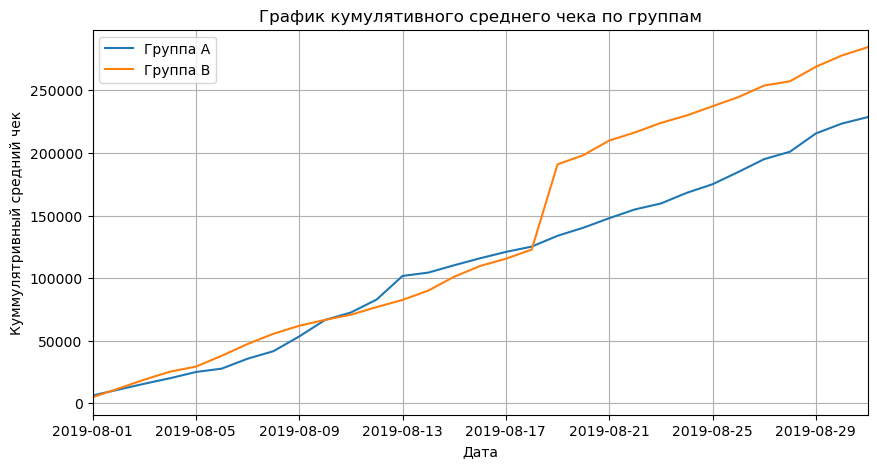

In [24]:
orders_cumsum_avg[orders_cumsum_avg['group'] == 'A'].plot(x='date', y='revenue_avg_cumsum', label='A', figsize=(10,5), ax=plt.subplot(1,1,1), grid=True)
orders_cumsum_avg[orders_cumsum_avg['group'] == 'B'].plot(x='date', y='revenue_avg_cumsum', label='B', figsize=(10,5), ax=plt.subplot(1,1,1), grid=True)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Куммулятривный средний чек')
plt.legend(labels=['Группа А', 'Группа B'])
plt.axis(xmin=('2019-08-01'), xmax=('2019-08-31'))
plt.show();

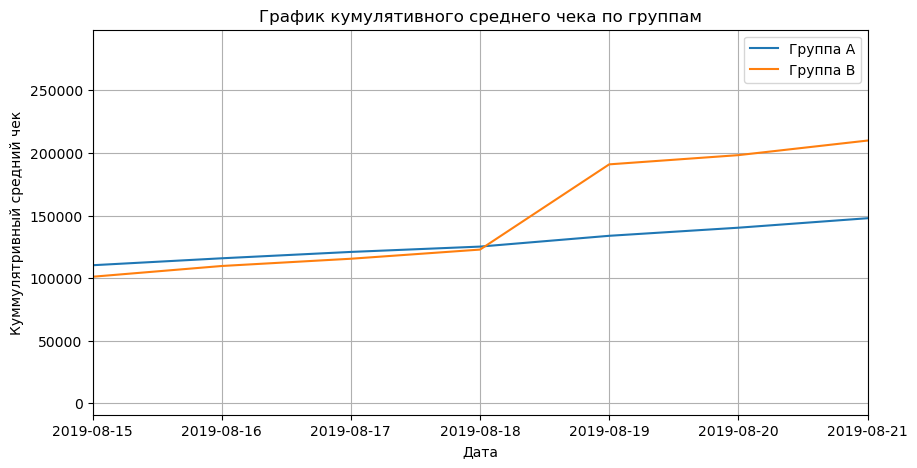

In [25]:
orders_cumsum_avg[orders_cumsum_avg['group'] == 'A'].plot(x='date', y='revenue_avg_cumsum', label='A', figsize=(10,5), ax=plt.subplot(1,1,1), grid=True)
orders_cumsum_avg[orders_cumsum_avg['group'] == 'B'].plot(x='date', y='revenue_avg_cumsum', label='B', figsize=(10,5), ax=plt.subplot(1,1,1), grid=True)
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Куммулятривный средний чек')
plt.legend(labels=['Группа А', 'Группа B'])
plt.axis(xmin=('2019-08-15'), xmax=('2019-08-21'))
plt.show();

<b>Вывод:</b> Как видно из графика средние кумулятивные выручки в группах примерно равны до 2019-08-19, в этот день мы наблюдаем аномальный скачек, вероятно были аномально большие покупки, разберемся с ними позже.

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

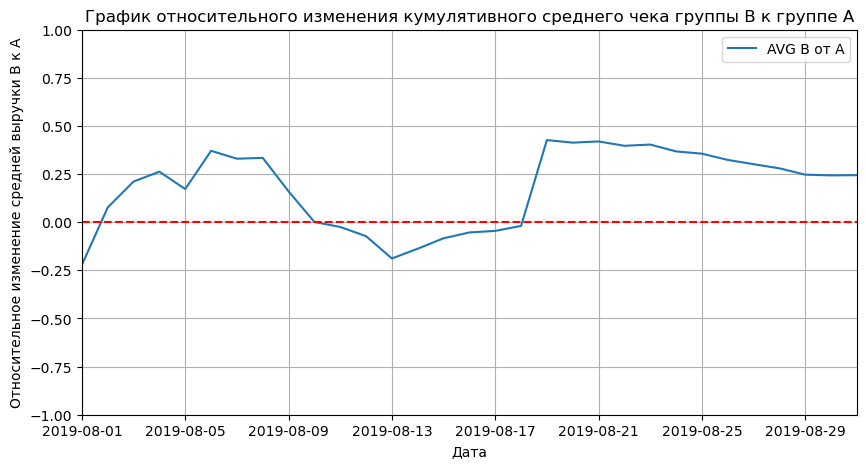

In [26]:
orders_cumsum_avg_b_a = orders_cumsum_avg[orders_cumsum_avg['group'] == 'A'][['date', 'revenue_avg_cumsum']].merge(orders_cumsum_avg[orders_cumsum_avg['group'] == 'B'][['date', 'revenue_avg_cumsum']], on='date')
orders_cumsum_avg_b_a['avg_cumsum_b_a'] = orders_cumsum_avg_b_a['revenue_avg_cumsum_y'] / orders_cumsum_avg_b_a['revenue_avg_cumsum_x'] -1
orders_cumsum_avg_b_a\
.plot(
    x='date', 
    y='avg_cumsum_b_a',
    figsize=(10,5),
    grid=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение средней выручки B к A')
plt.axis(['2019-08-01', '2019-08-31', -1, 1])
plt.legend(['AVG B от A'])
plt.axhline(y=0, color='red', linestyle='--')
plt.show();

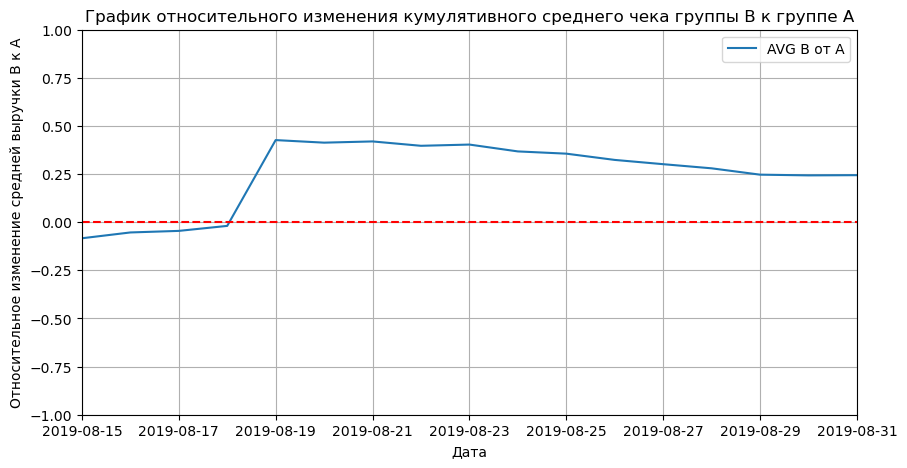

In [27]:
orders_cumsum_avg_b_a\
.plot(
    x='date', 
    y='avg_cumsum_b_a',
    figsize=(10,5),
    grid=True)
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение средней выручки B к A')
plt.axis(['2019-08-15', '2019-08-31', -1, 1])
plt.legend(['AVG B от A'])
plt.axhline(y=0, color='red', linestyle='--')
plt.show();

<b>Вывод:</b> До 19-ого числа видим разнонаправленный график, 19-ого происходит резкий скачек и дальше график плавно снижается, вероятно мы видели бы такую же картину, как до 19-ого если бы не было аномальных значений в этот день.

### Постройм график кумулятивного среднего количества заказов на посетителя по группам.

C:\Users\Professional\AppData\Local\Temp\ipykernel_2148\307526564.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bayers_visitors_cumsum.loc[:,'bayers_visitors_cumsum'] = bayers_visitors_cumsum['revenue_count_cumsum'] / bayers_visitors_cumsum['visitors_cumsum']


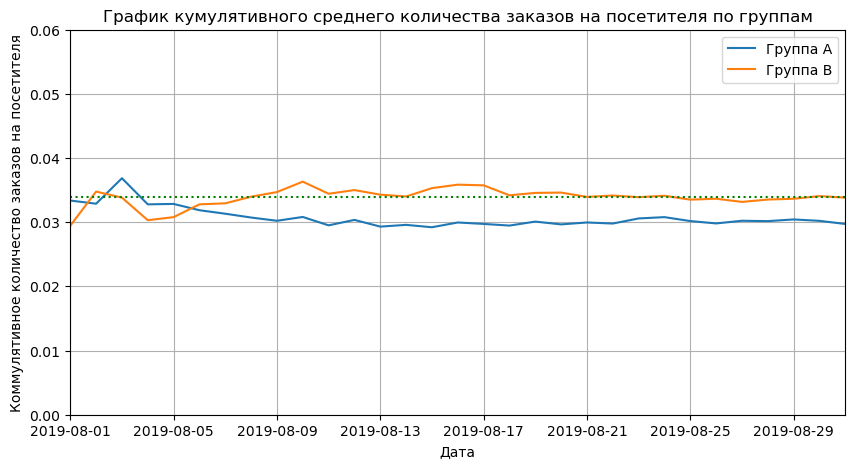

In [28]:
orders_visitors_cumsum_avg = orders_cumsum_avg.merge(visitors, on=['date', 'group'], how='left')

orders_visitors_cumsum_avg.loc[orders_visitors_cumsum_avg['group'] == 'A', 'revenue_count_cumsum'] =\
orders_visitors_cumsum_avg.loc[orders_visitors_cumsum_avg['group'] == 'A', 'revenue_count'].cumsum()

orders_visitors_cumsum_avg.loc[orders_visitors_cumsum_avg['group'] == 'B', 'revenue_count_cumsum'] =\
orders_visitors_cumsum_avg.loc[orders_visitors_cumsum_avg['group'] == 'B', 'revenue_count'].cumsum()

orders_visitors_cumsum_avg.loc[orders_visitors_cumsum_avg['group'] == 'A', 'visitors_cumsum'] =\
orders_visitors_cumsum_avg.loc[orders_visitors_cumsum_avg['group'] == 'A', 'visitors'].cumsum()

orders_visitors_cumsum_avg.loc[orders_visitors_cumsum_avg['group'] == 'B', 'visitors_cumsum'] =\
orders_visitors_cumsum_avg.loc[orders_visitors_cumsum_avg['group'] == 'B', 'visitors'].cumsum()

bayers_visitors_cumsum = orders_visitors_cumsum_avg[['date','group', 'revenue_count_cumsum', 'visitors_cumsum']]

bayers_visitors_cumsum.loc[:,'bayers_visitors_cumsum'] = bayers_visitors_cumsum['revenue_count_cumsum'] / bayers_visitors_cumsum['visitors_cumsum']

bayers_visitors_cumsum[bayers_visitors_cumsum['group'] == 'A'].plot(
    x='date',
    y='bayers_visitors_cumsum',
    grid=True,
    figsize=(10,5),
    ax=plt.subplot(1,1,1))
bayers_visitors_cumsum[bayers_visitors_cumsum['group'] == 'B'].plot(
    x='date',
    y='bayers_visitors_cumsum',
    grid=True,
    figsize=(10,5),
    ax=plt.subplot(1,1,1))
plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Коммулятивное количество заказов на посетителя')
plt.axis(xmin='2019-08-01', xmax='2019-08-31', ymin=0, ymax=0.06)
plt.legend(labels=['Группа А', 'Группа B'])
plt.axhline(y=0.034, color='green', linestyle='dotted')
plt.show();

<b>Вывод:</b> Как видно из графика, конверсия в покупки сначала имела разнонаправленную динамику для обеих групп, далее она стабилизировалась и с 17-ого числа стала для группы B примерно на 5 пунктов (в тысячных) или на ~16% выше, что говорит в ползу принятия выдвинутой гипотезы.

### Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. 

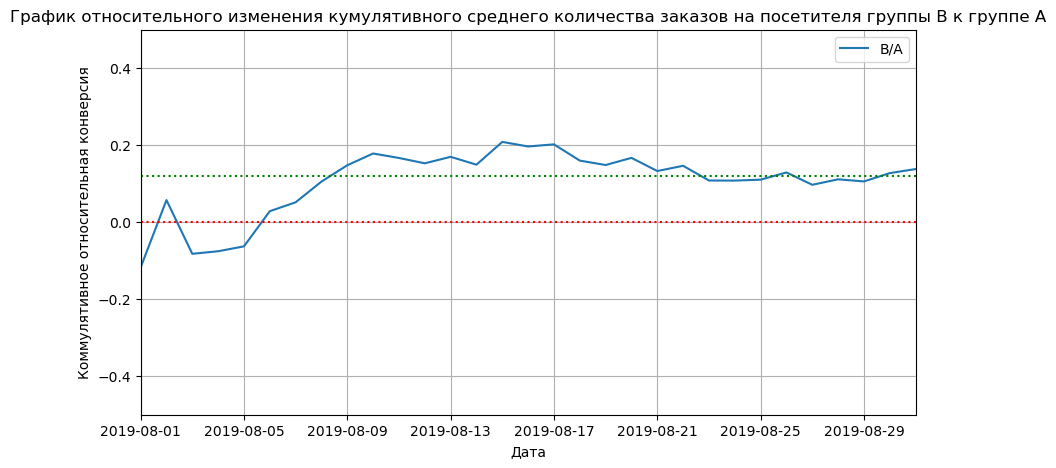

In [29]:
bayers_visitors_cumsum_B_A = bayers_visitors_cumsum[bayers_visitors_cumsum['group'] == 'B'].\
merge(bayers_visitors_cumsum[bayers_visitors_cumsum['group'] == 'A'], on='date', how='left')
bayers_visitors_cumsum_B_A = bayers_visitors_cumsum_B_A[['date', 'bayers_visitors_cumsum_x', 'bayers_visitors_cumsum_y']]
bayers_visitors_cumsum_B_A['bayers_visitors_cumsum_B_A'] = bayers_visitors_cumsum_B_A['bayers_visitors_cumsum_x'] / bayers_visitors_cumsum_B_A['bayers_visitors_cumsum_y'] - 1
bayers_visitors_cumsum_B_A.plot(
    x='date',
    y='bayers_visitors_cumsum_B_A',
    grid=True,
    figsize=(10,5)
    )
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Коммулятивное относительная конверсия')
plt.axis(xmin='2019-08-01', xmax='2019-08-31', ymin=-0.5, ymax=0.5)
plt.axhline(y=0.12, color='green', linestyle='dotted')
plt.axhline(y=0, color='red', linestyle='dotted')
plt.legend(['B/A'])
plt.show();

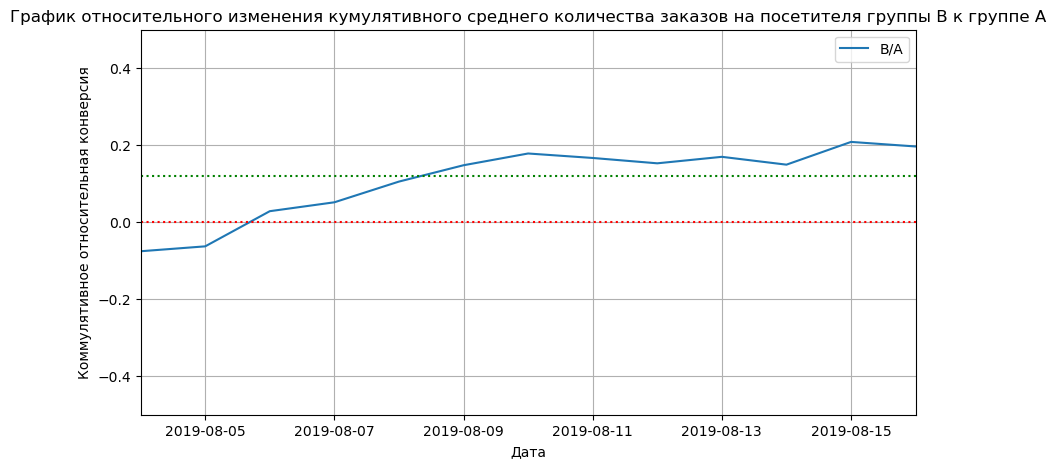

In [30]:
bayers_visitors_cumsum_B_A = bayers_visitors_cumsum[bayers_visitors_cumsum['group'] == 'B'].\
merge(bayers_visitors_cumsum[bayers_visitors_cumsum['group'] == 'A'], on='date', how='left')
bayers_visitors_cumsum_B_A = bayers_visitors_cumsum_B_A[['date', 'bayers_visitors_cumsum_x', 'bayers_visitors_cumsum_y']]
bayers_visitors_cumsum_B_A['bayers_visitors_cumsum_B_A'] = bayers_visitors_cumsum_B_A['bayers_visitors_cumsum_x'] / bayers_visitors_cumsum_B_A['bayers_visitors_cumsum_y'] - 1
bayers_visitors_cumsum_B_A.plot(
    x='date',
    y='bayers_visitors_cumsum_B_A',
    grid=True,
    figsize=(10,5)
    )
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Коммулятивное относительная конверсия')
plt.axis(xmin='2019-08-04', xmax='2019-08-16', ymin=-0.5, ymax=0.5)
plt.axhline(y=0.12, color='green', linestyle='dotted')
plt.axhline(y=0, color='red', linestyle='dotted')
plt.legend(['B/A'])
plt.show();

<b>Вывод:</b> На данном графике видим скачки 5-ого и особенно 10-ого, далее, c 21-ого относительное изменение стабилизируется и становится ~11-12%. Казалось бы, что гипотезу стоит принять, но есть странные скачки, что может говорить об аномалиях.

### Построим точечный график количества заказов по пользователям.

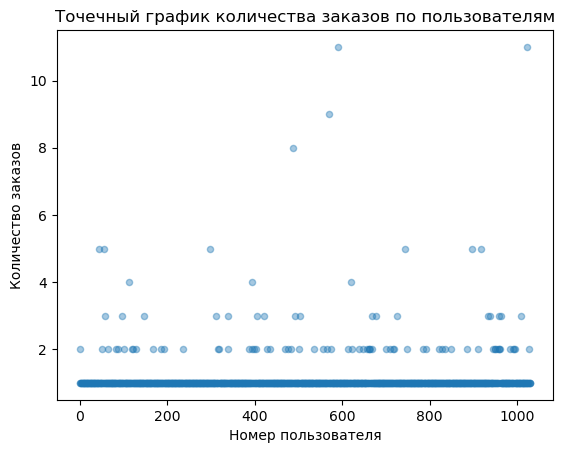

In [31]:
orders.pivot_table(index='visitor_id', values='transaction_id', aggfunc='nunique').reset_index().reset_index().\
plot(
    x='index',
    y='transaction_id',
    kind='scatter',
    alpha=0.4
    )
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Номер пользователя')
plt.ylabel('Количество заказов')
plt.show();

<b>Вывод:</b> Как видим, большинство пользователей делает по 1 заказу, некоторые делают по два, совсем редко больше трех, чтобы пользователи с аномальным кол-вом заказов не влияли на наше тестирование постараемся их обнулить

### Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [32]:
bayers = orders.pivot_table(index='visitor_id', values='transaction_id', aggfunc='nunique').reset_index().reset_index()

In [33]:
bayers['transaction_id'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95    2.0
0.96    2.0
0.97    2.0
0.98    3.0
0.99    4.0
Name: transaction_id, dtype: float64

<b>Вывод:</b>Как видим больше 2-ух заказов всего у 3-ех процентов пользователей у 2-ух процентов больше 3 - ех заказов, эту границу и примем для отсечки аномалий.

### Построим точечный график стоимостей заказов.

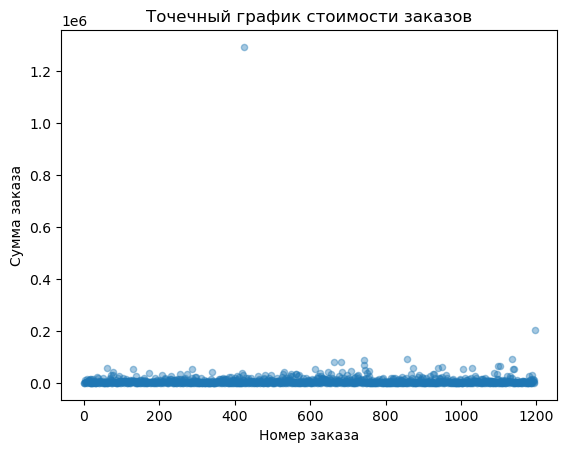

In [34]:
orders.reset_index().\
plot(
    x='index',
    y='revenue',
    kind='scatter',
    alpha=0.4
    )
plt.title('Точечный график стоимости заказов')
plt.xlabel('Номер заказа')
plt.ylabel('Сумма заказа')
plt.show();

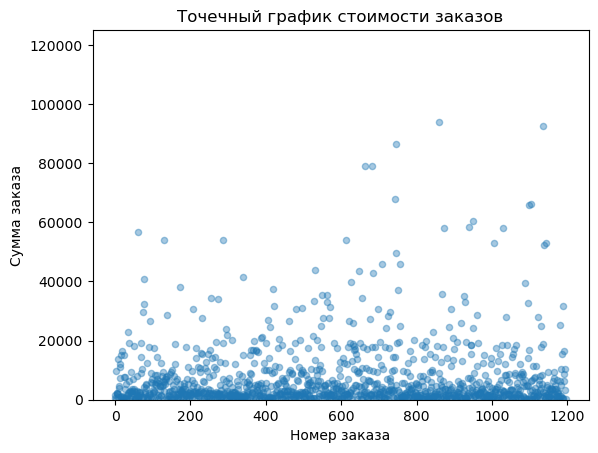

In [35]:
orders.reset_index().\
plot(
    x='index',
    y='revenue',
    kind='scatter',
    alpha=0.4
    )
plt.title('Точечный график стоимости заказов')
plt.xlabel('Номер заказа')
plt.ylabel('Сумма заказа')
plt.axis(ymin=0, ymax=125000)
plt.show();

<b>Вывод:</b>Как видим большинство заказов до 20000, есть несколько явно аномальных заказа, которые мы вычислили ранее, на 1294500 (2019-08-19) и 202740 (2019-08-15) их необходимо однозначно убрать, по остальным выбивающимся по сумме заказам посмотрим процентили.

### Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [36]:
orders['revenue'].quantile([0.95, 0.96, 0.97, 0.98, 0.99])

0.95    28000.0
0.96    31382.0
0.97    35485.0
0.98    44133.2
0.99    58233.2
Name: revenue, dtype: float64

<b>Вывод:</b>Как видим от 95% до 97% чек плавно растет, без особых всплесков, примем за аномальные чеки выше 35485.0, т.к. далее наблюдаем более существенные скачки при переходе границ процентилей.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Для определения p-value будем использовать критерий Манна-Уитни т.к. в данных есть аномальные значения, уровень статистической значимости примем равным 0,05.<br> Сформулируем гипотезы.<br> Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть. Подготовим данные.

Создадим переменные temp_a и temp_b с кол-ом заказов, посчитанным для каждого уникального пользователя для каждой группы (если их было 1 и более).

In [37]:
temp_a = orders[orders['group'] == 'A'].pivot_table(index='visitor_id', values='transaction_id', aggfunc='nunique').reset_index()['transaction_id']
temp_b = orders[orders['group'] == 'B'].pivot_table(index='visitor_id', values='transaction_id', aggfunc='nunique').reset_index()['transaction_id']

Посчитаем общее количество пользователей для каждой группы, сравним их.

In [38]:
visitors_a = visitors[visitors['group'] == 'A']['visitors'].sum()
visitors_b = visitors[visitors['group'] == 'B']['visitors'].sum()
print('В группе А:', visitors_a, 'пользователей')
print('В группе А:', visitors_b, 'пользователей')
print('В группе А на {:.2%} меньшше пользователей чем в B'.format(1- visitors_a / visitors_b))

В группе А: 18736 пользователей
В группе А: 18916 пользователей
В группе А на 0.95% меньшше пользователей чем в B


Подгготовим данные для проверки статистической значимости с помощью критерия Манна-Уитни.

In [39]:
sample_a = pd.concat([temp_a, pd.Series(0, index=range(len(temp_a), visitors_a))], axis=0)

In [40]:
sample_b = pd.concat([temp_b, pd.Series(0, index=range(len(temp_b), visitors_b))], axis=0)

Зададим уровень статистической значимости.

In [41]:
alpha = 0.05

In [42]:
print("P-value:{0:.3f}".format(stats.mannwhitneyu(sample_a, sample_b)[1]))
if stats.mannwhitneyu(sample_a, sample_b)[1] < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

P-value:0.017
Отвергаем нулевую гипотезу: разница статистически значима


In [43]:
print("Относительное увеличение конверсии:{0:.1%}".format(sample_b.mean() / sample_a.mean() - 1))

Относительное увеличение конверсии:13.8%


<b>Вывод:</b> Согласно проведенного анализа, различия в среднем количестве заказов есть, относительный выигрыш группы B равен 13.8%. Дополнительно, мы обнаружили, что группы не равны по объему, в группе А на ~1% меньше пользователей чем в группе B, что является основной ошибкой при анализе A/B тестов, разница не такая большая, но будем держать этот момент в голове.

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

Для определения p-value будем использовать критерий Манна-Уитни т.к. в данных есть аномальные значения, уровень статистической значимости примем равным 0,05.<br> Сформулируем гипотезы.<br> Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [44]:
print('P-value:{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
if stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1] < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

P-value:0.729
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [45]:
print('Относительное увеличение среднего чека:{0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Относительное увеличение среднего чека:25.9%


<b>Вывод:</b> Как видим, согласно критерия Манна-Уитни, отвергнуть нулевую гипотезу никак нельзя, но при этом относительное увеличение аж на 25,9%, вероятно так влияют аномальные значения, далее проверим без них.

### Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

Для определения p-value будем использовать критерий Манна-Уитни уровень статистической значимости примем равным 0,05.<br> Сформулируем гипотезы.<br> Нулевая: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

Подгготовим данные для проверки статистической значимости с помощью критерия Манна-Уитни.

In [46]:
sample_a_filtered = pd.concat([temp_a[temp_a < 3], pd.Series(0, index=range(len(temp_a[temp_a < 3]), visitors_a))], axis=0)



In [47]:
sample_b_filtered = pd.concat([temp_b[temp_b < 3], pd.Series(0, index=range(len(temp_b[temp_b < 3]), visitors_b))], axis=0)



Зададим уровень статистической значимости.

In [48]:
alpha = 0.05

In [49]:
print("P-value:{0:.3f}".format(stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]))
if stats.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1] < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

P-value:0.013
Отвергаем нулевую гипотезу: разница статистически значима


In [50]:
print("Относительное увеличение конверсии:{0:.1%}".format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

Относительное увеличение конверсии:16.8%


<b>Вывод:</b> Согласно проведенного анализа, различия в среднем количестве заказов есть, p-value уменьшился после отчистки на 5 пунктов, относительный выигрыш группы B снизился до 16.8%. 

### Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

Для определения p-value будем использовать критерий Манна-Уитни, уровень статистической значимости примем равным 0,05.<br> Сформулируем гипотезы.<br> Нулевая: различий в среднем чеке между группами нет. Альтернативная: различия в среднем чеке между группами есть.

In [51]:
print('P-value:{0:.3f}'.format(stats.mannwhitneyu(orders[(orders['group']=='A') & (orders['revenue'] < 35485.0)]['revenue'],\
                                                   orders[(orders['group']=='B') & (orders['revenue'] < 35485.0)]['revenue'])[1]))
if stats.mannwhitneyu(orders[(orders['group']=='A') & (orders['revenue'] < 35485.0)]['revenue'],\
                      orders[(orders['group']=='B') & (orders['revenue'] < 35485.0)]['revenue'])[1] < alpha:
    print('Отвергаем нулевую гипотезу: разница статистически значима')
else:
    print(
        'Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя'
    )

P-value:0.578
Не получилось отвергнуть нулевую гипотезу, вывод о различии сделать нельзя


In [52]:
print('Относительное увеличение среднего чека:{0:.1%}'.format(orders[(orders['group']=='B') & (orders['revenue'] < 35485.0)]['revenue'].mean()\
                                                              /orders[(orders['group']=='A') & (orders['revenue'] < 35485.0)]['revenue'].mean()-1))



Относительное увеличение среднего чека:4.6%


<b>Вывод:</b> Как видим, согласно критерия Манна-Уитни, хотя p-value уменьшился с 0.729 до 0.578, отвергнуть нулевую гипотезу по прежннему никак нельзя, при этом относительное увеличение среднего чека упало до 4,6% и мы уже можем сказать, что средние чеки скорее равны, чем не равны.

## Вывод, принимаем решение по результатам теста

Посмотрим на факты:<br>
- Есть статистически значимое различие по среднему количеству заказов между группами как по «сырым», так и по данным после фильтрации аномалий;
- Конверсия в группе B после фильтрации аномалий стала меньше, но по прежнему выше чем у группы А на 16,8%;
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- Средний чек в группе B увеличился на 4,6% по сравнению с группой А, что не значительно и связано с тем, что cохраняя данные мы взяли высокий потолок для аномалий, если взять предел следующего процентиля (96%), то разница падает до 2,8%;
- График различия конверсии между группами по «сырым» данным показывает, что уровень уже стабилизировался, мы набрали достаточно наблюдений для того, чтобы сделать вывод;
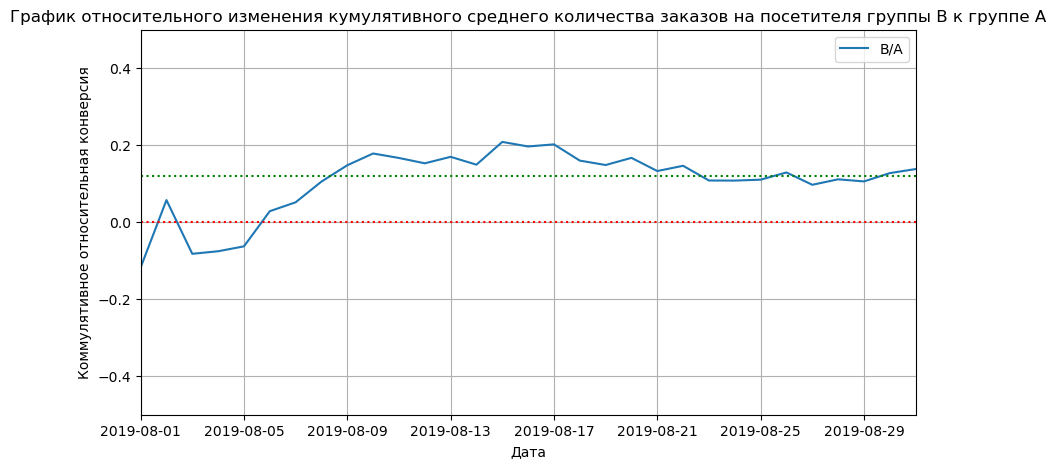
- График различия среднего чека по «сырым» данным говорит о том, что результаты группы B ухудшаются день ото дня не смотря на аномалии которые были ранее, самые аномально аномальные 1294500 (2019-08-19) и 202740 (2019-08-15);
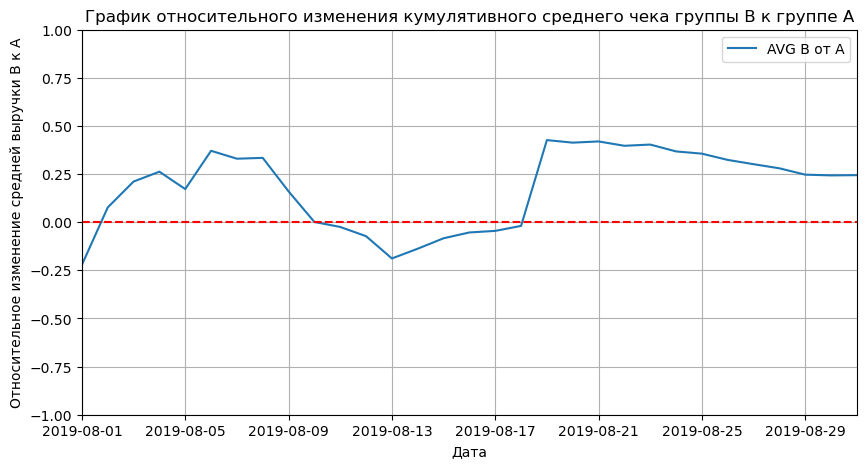
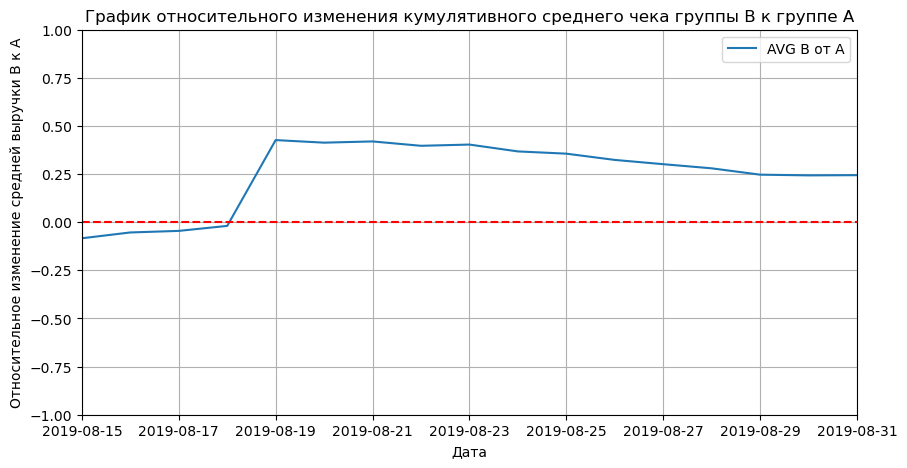
- Группы не равны, в группе  А на ~1% меньше пользователей чем в группе B, что говорит не в пользу группы B по объему выручки.

<b> Исходя из обнаруженных фактов, тест следует остановить и признать его успешным, т.к. мы признали изменение средней конверсии статистически значимым, нам удалось увеличить конверсию на 16,8% относительно группы А. Продолжать наблюдения смысла нет, т.к. мы видим, что набрали достаточное кол-во наблюдений, уровни метрик стабилизировались.